<a href="https://colab.research.google.com/github/Abhijith-Nagarajan/PadhAI_Implementations/blob/main/Optimizers_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> The purpose of this notebook is understand optimization algorithms by building them from scratch</h2>

<b> Optimizers to implement </b>
1.   Momentum based gradient descent
2.   Nestarov Accelerated gradient descent
3.   Adagrad
4.   RMSProp
5.   Adam

<b> Similarly, the weights will be updated in two ways:</b>
1.   Mini-batch GD
2.   Stochastic GD




#### Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,preprocessing,model_selection,metrics
import warnings
from tqdm import tqdm_notebook

In [2]:
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(0)

#### Updating Sigmoid Neuron class

In [ ]:
# For linear data
X_sg = np.array([[1,2,3,4,5],[-1,-2,-3,-4,-5],[0,0.2,0.4,0.6,1],[1,3,5,7,9],[2,3,4,5,6],[2,1,3,4,2],[-3,0,1,4,2],[1,0,4,1,5],[0,0,1,5,3]])
Y_sg = np.array([0.2,0.4,0.65,0.81,0.99,0.71,0.8,0.84,0.40])

In [ ]:
class Sigmoid_Neuron_Updated:
    def __init__(self,X,loss_function,optimizer,update_method='mini_batch_GD'):
        self.weights = np.random.randn(X.shape[1])
        self.v_w, self.v_b = 0,0
        self.bias = np.random.randn()
        self.loss_function = loss_function
        self.optimizer = optimizer

        match update_method:
            case "batch_GD":
                self.size_of_batch = X.shape(0)
            case "mini_batch_GD":
                self.size_of_batch = 2
            case "stochastic_GD":
                self.size_of_batch = 1

        self.update_method = update_method
        print('Initialization has been completed.')

    def fit(self,X,Y,lr,epochs):
        match self.optimizer:
            case "GD":
                print('Invoking gradient descent flow.')
                self.gradient_descent(X,Y,lr,epochs)

            case 'Momentum_GD':
                print('Invoking momentum gradient descent flow.')
                self.momentum_gradient_descent(X,Y,lr,epochs)

            case 'NAG':
                print('Invoking Nestarov Accelerated gradient descent flow.')
                self.nestarov_accelerated_gradient_descent(X,Y,lr,epochs)

    def sigmoid_operation(self,x,w=None,b=None):
        if w is None:
            w = self.weights
        if b is None:
            b = self.bias
        return 1.0/(1.0+np.exp(-1*(np.dot(x,w.T)+b)))

    def grad_w(self,x,y,y_pred):
        return (y_pred-y)*(y_pred*x*(1-y_pred)) if self.loss_function == 'MSE' else x*(y-y_pred)

    def grad_b(self,y,y_pred):
        return (y_pred-y)*(y_pred*(1-y_pred)) if self.loss_function == 'MSE' else (y-y_pred)

    def plot_loss_vs_epoch(self,loss:dict):
        print(f'Plotting Loss vs Epoch for {self.optimizer}')
        plt.figure(figsize=(15,6))
        plt.scatter(loss.keys(),loss.values())
        plt.plot(loss.keys(),loss.values())
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Loss vs Epoch for {self.optimizer}')

    def gradient_descent(self,X,Y,lr,epochs):
        print('Starting Gradient Descent execution')
        loss_dict = dict()
        for epoch in tqdm_notebook(range(epochs),desc='Epochs',unit='Epoch'):
            dw, db = 0,0
            loss = 0
            count = 0
            for x,y in zip(X,Y):
                y_pred = self.sigmoid_operation(x)
                dw += self.grad_w(x,y,y_pred)
                db += self.grad_b(y,y_pred)
                loss +=  0.5*(y-y_pred)**2 if self.loss_function == 'MSE' else y*np.log(y_pred)
                count+=1
                if count%self.size_of_batch==0:
                    self.weights -= lr*dw
                    self.bias -= lr*db
                    dw,db = 0,0

            loss_dict[epoch+1] = loss
        self.plot_loss_vs_epoch(loss_dict)

    def momentum_gradient_descent(self,X,Y,lr,epochs):
        loss_dict = dict()
        gamma = 0.9
        for epoch in tqdm_notebook(range(epochs),desc='Epochs',unit='Epoch'):
            dw, db = 0,0
            loss = 0
            count = 0
            for x,y in zip(X,Y):
                y_pred = self.sigmoid_operation(x)
                dw += self.grad_w(x,y,y_pred)
                db += self.grad_b(y,y_pred)
                loss += 0.5*(y-y_pred)**2 if self.loss_function == 'MSE' else y*np.log(y_pred)
                count+=1
                if count%self.size_of_batch==0:
                    self.v_w = gamma*self.v_w + lr*dw
                    self.v_b = gamma*self.v_b + lr*db
                    self.weights -= self.v_w
                    self.bias -= self.v_b
                    dw, db = 0,0
            loss_dict[epoch+1] = loss
        self.plot_loss_vs_epoch(loss_dict)

    def nestarov_accelerated_gradient_descent(self,X,Y,lr,epochs):
        loss_dict = dict()
        gamma = 0.9
        for epoch in tqdm_notebook(range(epochs),desc='Epochs',unit='Epoch'):
            dw, db = 0,0
            loss = 0
            count = 0
            for x,y in zip(X,Y):
                w_temp = self.weights - gamma*self.v_w
                b_temp = self.bias - gamma*self.v_b
                y_pred = self.sigmoid_operation(x,w_temp,b_temp)
                dw += self.grad_w(x,y,y_pred)
                db += self.grad_b(y,y_pred)
                loss += 0.5*(y-y_pred)**2 if self.loss_function == 'MSE' else y*np.log(y_pred)
                count+=1
                if count%self.size_of_batch==0:
                    self.v_w = gamma*self.v_w + lr*dw
                    self.v_b = gamma*self.v_b + lr*db
                    self.weights -= self.v_w
                    self.bias -= self.v_b
                    dw, db = 0,0
            loss_dict[epoch+1] = loss
        self.plot_loss_vs_epoch(loss_dict)

In [ ]:
loss = 'MSE'
optimizer = 'GD'

In [ ]:
sn_model = Sigmoid_Neuron_Updated(X_sg,loss,optimizer)

Initialization has been completed.


Invoking gradient descent flow.
Starting Gradient Descent execution


Epochs:   0%|          | 0/2500 [00:00<?, ?Epoch/s]

Plotting Loss vs Epoch for GD


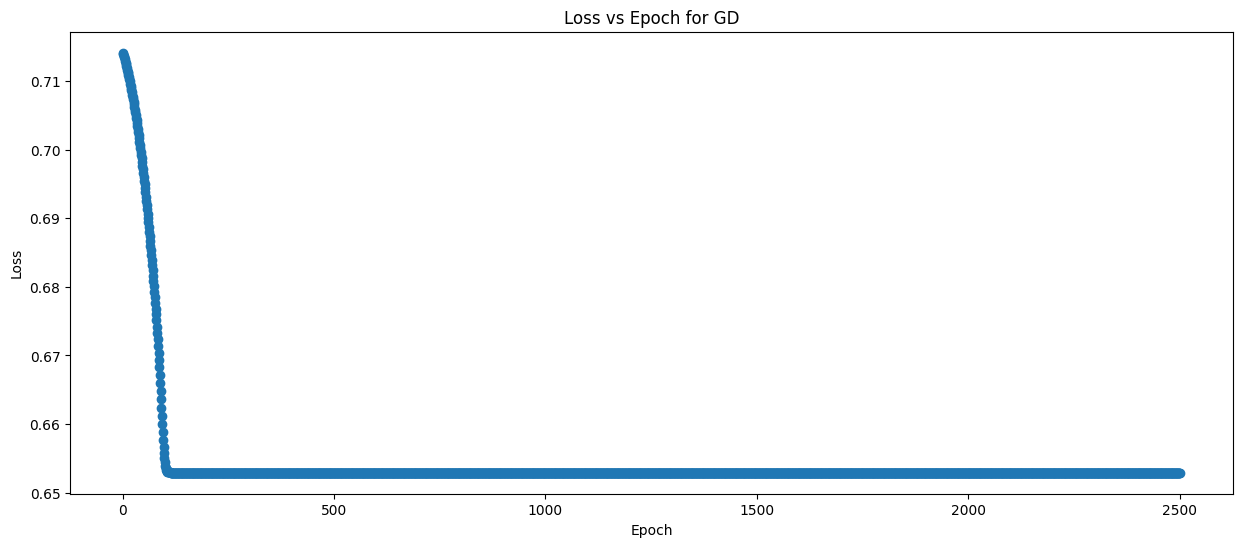

In [ ]:
sn_model.fit(X_sg,Y_sg,0.30,2500)

In [ ]:
momentum_model = Sigmoid_Neuron_Updated(X_sg,loss,'Momentum_GD')

Initialization has been completed.


Invoking momentum gradient descent flow.


Epochs:   0%|          | 0/2500 [00:00<?, ?Epoch/s]

Plotting Loss vs Epoch for Momentum_GD


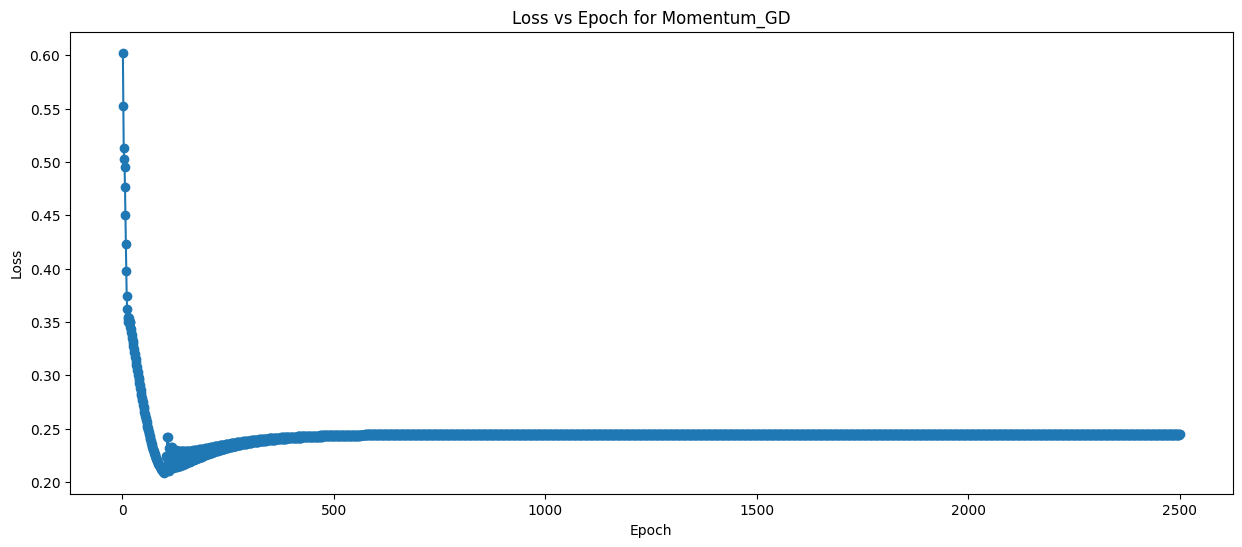

In [ ]:
momentum_model.fit(X_sg,Y_sg,0.1,2500)

In [ ]:
nag_model = Sigmoid_Neuron_Updated(X_sg,loss,'NAG')

Initialization has been completed.


Invoking Nestarov Accelerated gradient descent flow.


Epochs:   0%|          | 0/2500 [00:00<?, ?Epoch/s]

Plotting Loss vs Epoch for NAG


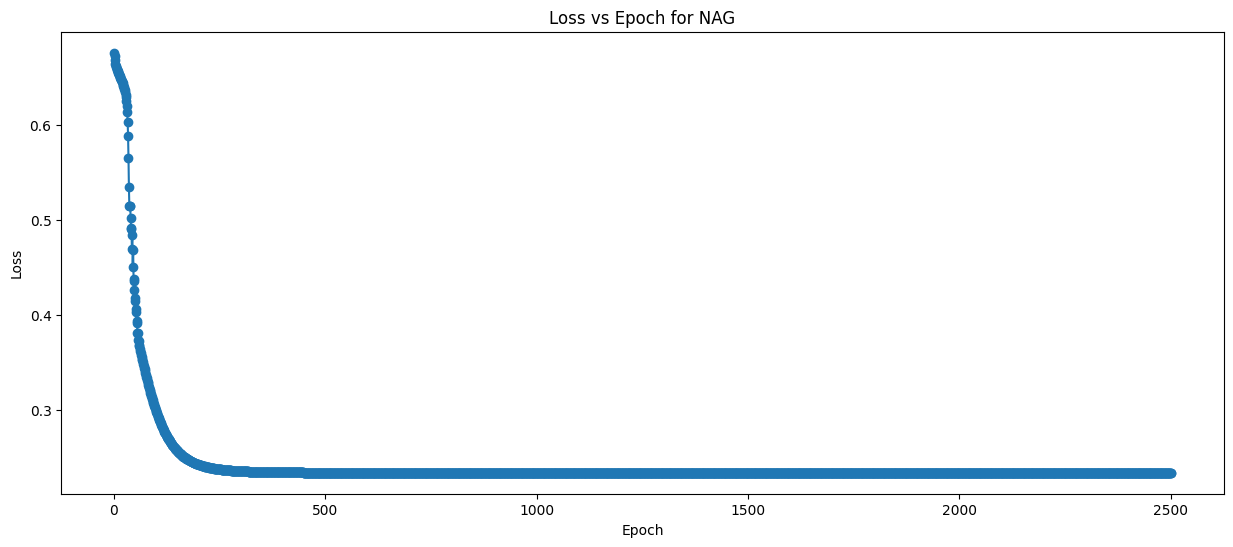

In [ ]:
nag_model.fit(X_sg,Y_sg,0.1,2500)

#### Generating non-linear data

Converting the first and second features into sparse data

In [4]:
target_classes = 5

In [5]:
# For non-linear data
X,Y = datasets.make_blobs(n_samples=80000,n_features=10,centers=target_classes)

In [6]:
X[:90000,0] = 0
X[90001:,0] = 1

X[:90000,1] = 0
X[90001:,1] = 1

In [7]:
np.random.shuffle(X[0])
np.random.shuffle(X[1])

In [8]:
X_training,X_test,Y_training,Y_test = model_selection.train_test_split(X,Y,test_size= 0.3,random_state=42,shuffle=True)

In [9]:
X_train, X_valid, Y_train, Y_valid = model_selection.train_test_split(X_training,Y_training,test_size= 0.2,random_state=42,shuffle=True)

In [10]:
oh_encoder = preprocessing.OneHotEncoder()

In [11]:
Y_train_encoded = oh_encoder.fit_transform(np.expand_dims(Y_train,axis=1)).toarray()
Y_valid_encoded = oh_encoder.fit_transform(np.expand_dims(Y_valid,axis=1)).toarray()

#### Obtaining the model inputs

In [12]:
layers = int(input('Enter the number of hidden layers: '))
neurons_per_layer = [input(f'Enter neurons for hidden layer {i+1}: ') for i in range(layers)]
neurons_per_layer = list(map(int,neurons_per_layer))

Enter the number of hidden layers: 4
Enter neurons for hidden layer 1: 4
Enter neurons for hidden layer 2: 3
Enter neurons for hidden layer 3: 3
Enter neurons for hidden layer 4: 4


#### Updating the Feedforward class

In [20]:
class FeedforwardNetwork:
    def __init__(self, X:np.ndarray, target_classes:int, loss_function:str, layers:int, neurons_per_layer:list, optimizer:str, activation_function:str, update_method='mini-batch'):
        self.weights = []
        self.bias = []
        self.v_w = []
        self.v_b = []
        self.m_w = []
        self.m_b = []
        self.A = []
        self.H = []
        self.loss_info = dict()
        self.loss_function = loss_function
        self.layers = layers
        self.neurons_per_layer = neurons_per_layer
        self.optimizer = optimizer
        self.update_method = update_method
        self.activation = activation_function

        match update_method:
            case 'SGD':
                self.batch_size = 1
            case 'mini-batch':
                self.batch_size = 128

        rows, features = X.shape
        self.no_batches = int(np.floor(rows/self.batch_size))
        self.last_batch_size = rows - self.no_batches*self.batch_size

        # Initializing the weights and bias for the hidden layers using Xavier initialization
        for i in range(layers):
            weights_array = np.random.rand(features,neurons_per_layer[i])/np.sqrt(neurons_per_layer[i]) if i==0 else np.random.rand(neurons_per_layer[i-1],neurons_per_layer[i])/np.sqrt(neurons_per_layer[i])
            bias_array = np.random.rand(self.batch_size,neurons_per_layer[i])/np.sqrt(neurons_per_layer[i])

            self.weights.append(weights_array)
            self.bias.append(bias_array)

            self.v_w.append(np.zeros((features,neurons_per_layer[i])) if i==0 else np.zeros((neurons_per_layer[i-1],neurons_per_layer[i])))
            self.v_b.append(np.zeros((self.batch_size,neurons_per_layer[i])))

            self.m_w.append(np.zeros((features,neurons_per_layer[i])) if i==0 else np.zeros((neurons_per_layer[i-1],neurons_per_layer[i])))
            self.m_b.append(np.zeros((self.batch_size,neurons_per_layer[i])))

        # For output layer
        self.weights.append(np.random.rand(neurons_per_layer[-1],target_classes)/np.sqrt(target_classes))
        self.v_w.append(np.zeros((neurons_per_layer[-1],target_classes)))
        self.m_w.append(np.zeros((neurons_per_layer[-1],target_classes)))

        self.bias.append(np.random.rand(self.batch_size,target_classes)/np.sqrt(neurons_per_layer[-1]))
        self.v_b.append(np.zeros((self.batch_size,target_classes)))
        self.m_b.append(np.zeros((self.batch_size,target_classes)))

        print('Feedforward network has been initialized.')

    def plot_loss_vs_epoch(self):
        plt.figure(figsize=(15,7))
        xaxis_rows = len(self.loss_info.keys())
        plt.scatter(x=self.loss_info.keys(),y=self.loss_info.values())
        plt.xticks(np.arange(0,xaxis_rows,xaxis_rows/10),rotation=325)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss vs Epoch plot')


    def derivative_of_activation(self,layer):
        match self.activation:
            case 'sigmoid':
                return self.H[layer]*(1-self.H[layer])

            case 'tanh':
                return 1 - np.square(self.H[layer])

            case 'relu':
                return 1.0*(self.H[layer]>0)

    def momentum_GD(self,X,Y,Y_pred,lr,gamma):
        grad_a = (Y_pred - Y)
        for layer in range(self.layers,0,-1):
            grad_w = np.matmul(self.H[layer-1].T,grad_a)
            grad_b = grad_a

            grad_h = np.matmul(grad_a,self.weights[layer].T)
            derivative_h = self.derivative_of_activation(layer-1)
            grad_a = np.multiply(grad_h,derivative_h)

            self.v_w[layer] = gamma*self.v_w[layer] + lr*(grad_w/self.batch_size)
            self.v_b[layer] = gamma*self.v_b[layer] + lr*(grad_b/self.batch_size)

            self.weights[layer]-= self.v_w[layer]
            self.bias[layer]-= self.v_b[layer]

        layer = 0
        grad_w = np.matmul(X.T,grad_a)
        grad_b = grad_a

        self.v_w[layer] = gamma*self.v_w[layer] + lr*(grad_w/self.batch_size)
        self.v_b[layer] = gamma*self.v_b[layer] + lr*(grad_b/self.batch_size)

        self.weights[layer]-= self.v_w[layer]
        self.bias[layer]-= self.v_b[layer]

    def nestarov_GD(self,X,Y,Y_pred,lr,gamma):
        grad_a = Y_pred - Y
        for layer in range(self.layers,0,-1):
            w_temp = self.weights[layer] - gamma*self.v_w[layer]
            b_temp = self.bias[layer] - gamma*self.v_b[layer]

            grad_w = np.matmul(self.H[layer-1].T,grad_a)
            grad_b = grad_a

            grad_h = np.matmul(grad_a,w_temp.T)
            derivative_h = self.derivative_of_activation(layer-1)
            grad_a = np.multiply(grad_h,derivative_h)

            self.v_w[layer] = gamma*self.v_w[layer] + lr*(grad_w/self.batch_size)
            self.v_b[layer] = gamma*self.v_b[layer] + lr*(grad_b/self.batch_size)

            self.weights[layer] -= lr*self.v_w[layer]
            self.bias[layer] -= lr*self.v_b[layer]

        layer = 0
        grad_w = np.matmul(X.T,grad_a)
        grad_b = grad_a

        self.v_w[layer] = gamma*self.v_w[layer] + lr*(grad_w/self.batch_size)
        self.v_b[layer] = gamma*self.v_b[layer] + lr*(grad_b/self.batch_size)
        self.weights[layer] -= lr*self.v_w[layer]
        self.bias[layer] -= lr*self.v_b[layer]

    def adagrad_implementation(self,X,Y,Y_pred,lr,epsilon):
        grad_a = (Y_pred - Y)
        for layer in range(self.layers,0,-1):
            grad_w = np.matmul(self.H[layer-1].T,grad_a)
            grad_b = grad_a

            grad_h = np.matmul(grad_a,self.weights[layer].T)
            derivative_h = self.derivative_of_activation(layer-1)
            grad_a = np.multiply(grad_h,derivative_h)

            self.v_w[layer] = self.v_w[layer] + (grad_w/self.batch_size)**2
            self.v_b[layer] = self.v_b[layer] + (grad_b/self.batch_size)**2

            self.weights[layer] -=  (lr/(np.sqrt(self.v_w[layer])+epsilon))*(grad_w/self.batch_size)
            self.bias[layer]-= (lr/(np.sqrt(self.v_b[layer])+epsilon))*(grad_b/self.batch_size)

        layer = 0
        grad_w = np.matmul(X.T,grad_a)
        grad_b = grad_a

        self.v_w[layer] = self.v_w[layer] + (grad_w/self.batch_size)**2
        self.v_b[layer] = self.v_b[layer] + (grad_b/self.batch_size)**2

        self.weights[layer] -=  (lr/(np.sqrt(self.v_w[layer])+epsilon))*(grad_w/self.batch_size)
        self.bias[layer]-= (lr/(np.sqrt(self.v_b[layer])+epsilon))*(grad_b/self.batch_size)

    def rmsprop_implementation(self,X,Y,Y_pred,lr,epsilon,beta):
        grad_a = (Y_pred - Y)
        for layer in range(self.layers,0,-1):
            grad_w = np.matmul(self.H[layer-1].T,grad_a)
            grad_b = grad_a

            grad_h = np.matmul(grad_a,self.weights[layer].T)
            derivative_h = self.derivative_of_activation(layer-1)
            grad_a = np.multiply(grad_h,derivative_h)

            self.v_w[layer] = beta*self.v_w[layer] + (1-beta)*(grad_w/self.batch_size)**2
            self.v_b[layer] = beta*self.v_b[layer] + (1-beta)*(grad_b/self.batch_size)**2

            self.weights[layer] -=  (lr/(np.sqrt(self.v_w[layer])+epsilon))*(grad_w/self.batch_size)
            self.bias[layer]-= (lr/(np.sqrt(self.v_b[layer])+epsilon))*(grad_b/self.batch_size)

        layer = 0
        grad_w = np.matmul(X.T,grad_a)
        grad_b = grad_a
        self.v_w[layer] = beta*self.v_w[layer] + (1-beta)*(grad_w/self.batch_size)**2
        self.v_b[layer] = beta*self.v_b[layer] + (1-beta)*(grad_b/self.batch_size)**2

        self.weights[layer] -=  (lr/(np.sqrt(self.v_w[layer])+epsilon))*(grad_w/self.batch_size)
        self.bias[layer]-= (lr/(np.sqrt(self.v_b[layer])+epsilon))*(grad_b/self.batch_size)

    def adam_implementation(self,X,Y,Y_pred,lr,epsilon,beta1,beta2):
        grad_a = Y_pred-Y
        for layer in range(self.layers,0,-1):
            grad_w = np.matmul(self.H[layer-1].T,grad_a)
            grad_b = grad_a

            grad_h = np.matmul(grad_a,self.weights[layer].T)
            derivative_h = self.derivative_of_activation(layer-1)
            grad_a = np.multiply(grad_h,derivative_h)

            self.m_w[layer] = beta1*self.v_w[layer] + (1-beta1)*grad_w
            self.m_b[layer] = beta1*self.v_b[layer] + (1-beta1)*grad_b

            self.v_w[layer] = beta2*self.v_w[layer] + (1-beta2)*(grad_w)**2
            self.v_b[layer] = beta2*self.v_b[layer] + (1-beta2)*(grad_b)**2

            self.weights[layer] -= (lr/(np.sqrt(self.v_w[layer])+epsilon))*self.m_w[layer]
            self.bias[layer] -= (lr/(np.sqrt(self.v_b[layer])+epsilon))*self.m_b[layer]

        layer = 0
        grad_w = np.matmul(X.T,grad_a)
        grad_b = grad_a

        self.m_w[layer] = beta1*self.v_w[layer] + (1-beta1)*grad_w
        self.m_b[layer] = beta1*self.v_b[layer] + (1-beta1)*grad_b

        self.v_w[layer] = beta2*self.v_w[layer] + (1-beta2)*(grad_w)**2
        self.v_b[layer] = beta2*self.v_b[layer] + (1-beta2)*(grad_b)**2

        self.weights[layer] -= (lr/(np.sqrt(self.v_w[layer])+epsilon))*self.m_w[layer]
        self.bias[layer] -= (lr/(np.sqrt(self.v_b[layer])+epsilon))*self.m_b[layer]

    def activation_operation(self,A,leaky_slope,output_layer=False):
        if output_layer:
            exp_a = np.exp(A)
            sum_of_exp = np.sum(exp_a,axis=1)
            y_pred_probabilities = [exp_a[i]/sum_of_exp[i] for i in range(len(sum_of_exp))]
            return np.array(y_pred_probabilities)

        match self.activation:
            case 'sigmoid':
                return 1.0/(1.0+np.exp(-1*A))

            case 'tanh':
                return np.tanh(A)

            case 'relu':
                return np.where(A>0,A,0)

            case 'leaky_relu':
                return np.where(A>0,A,leaky_slope*A)

    def forward_pass(self,X,batch_no,leaky_slope=None):
        for layer in range(self.layers):
            #bias_term = self.bias[layer][:self.last_batch_size] if batch_no==self.no_batches else self.bias[layer]
            #print(f'Input Shape: {X.shape}\nWeights Shape: {self.weights[layer].shape}\nBias Shape: {bias_term.shape}\n') if batch_no==self.no_batches else ''
            a = np.matmul(X,self.weights[layer])+self.bias[layer] if layer==0 else np.matmul(self.H[layer-1],self.weights[layer])+self.bias[layer]
            self.A.append(a)
            self.H.append(self.activation_operation(a,leaky_slope))

        #bias_term = self.bias[-1][:self.last_batch_size] if batch_no==self.no_batches else self.bias[-1]
        a = np.matmul(self.H[-1],self.weights[-1])+self.bias[-1]
        self.A.append(a)
        self.H.append(self.activation_operation(a,leaky_slope,True))
        return self.H[-1]

    def fit(self,X,Y,lr,epochs,beta=0.9,gamma=0.7,epsilon=np.exp(-8),beta2=0.999,leaky_slope=0.05):
        # Performs the forward and back prop
        Y_pred = []
        for epoch in tqdm_notebook(range(epochs),unit='Epoch',desc='Epochs'):
            for batch in range(self.no_batches):
                if batch!=self.no_batches:
                    X_batch = X[batch*self.batch_size:(batch+1)*self.batch_size]
                    Y_batch = Y[batch*self.batch_size:(batch+1)*self.batch_size]
                '''
                else:
                    X_batch = X[batch*self.batch_size:]
                    Y_batch = Y[batch*self.batch_size:]
                '''
                Y_pred_batch = self.forward_pass(X_batch,batch,leaky_slope) if self.activation == 'leaky_relu' else self.forward_pass(X_batch,batch)
                Y_pred.append(Y_pred_batch)
                if batch%100==0:
                    self.loss_info[str(epoch+1)+'_'+str(batch)] = metrics.log_loss(Y_batch,Y_pred_batch)

                match self.optimizer:
                    case 'Momentum GD':
                        self.momentum_GD(X_batch,Y_batch,Y_pred_batch,lr,gamma)

                    case 'NAG':
                        self.nestarov_GD(X_batch,Y_batch,Y_pred_batch,lr,gamma)

                    case 'Adagrad':
                        self.adagrad_implementation(X_batch,Y_batch,Y_pred_batch,lr,epsilon)

                    case 'RMSProp':
                        self.rmsprop_implementation(X_batch,Y_batch,Y_pred_batch,lr,epsilon,beta)

                    case 'Adam':
                        self.adam_implementation(X_batch,Y_batch,Y_pred_batch,lr,epsilon,beta,beta2)

            #print(f'All batches processed for epoch {epoch+1}')

        print('Training completed. Plotting the loss')
        self.plot_loss_vs_epoch()

    def predict(self,X_test,leaky_slope=None):
        Y_pred_test = self.activation_operation(X_test,leaky_slope,True)
        return Y_pred_test

In [14]:
ffmodel = FeedforwardNetwork(X_train,target_classes,'cross-entropy',layers,neurons_per_layer,'Momentum GD','relu')

Feedforward network has been initialized.


Epochs:   0%|          | 0/200 [00:00<?, ?Epoch/s]

Training completed. Plotting the loss


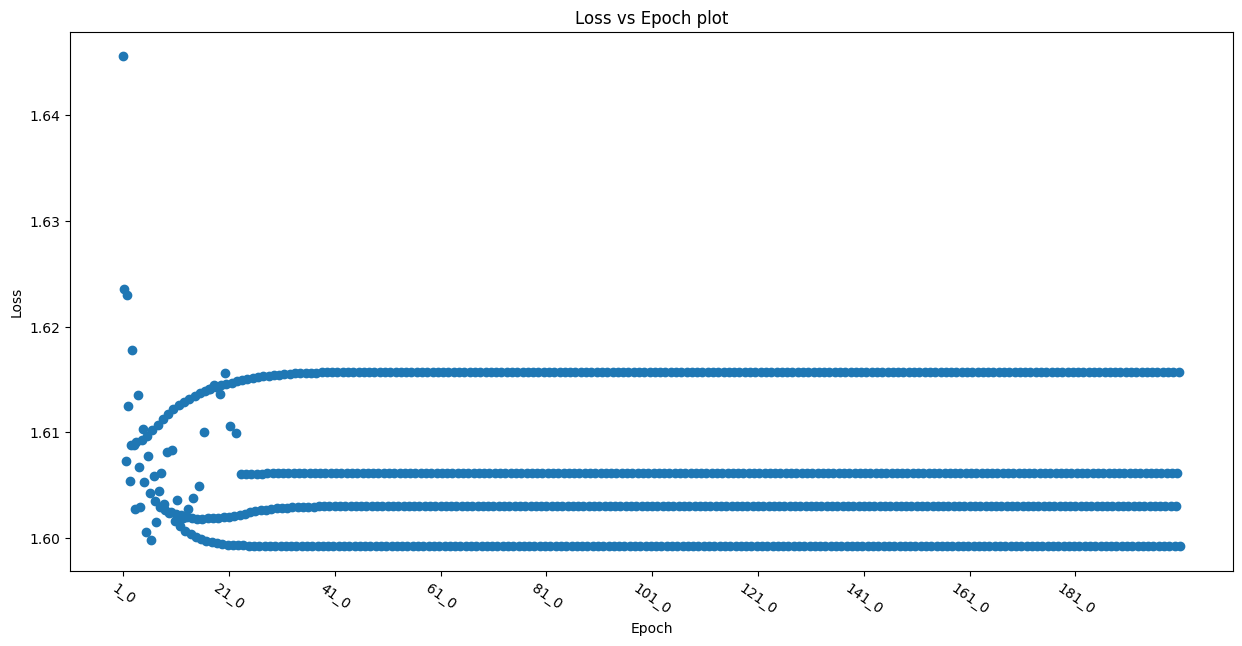

In [15]:
ffmodel.fit(X_train,Y_train_encoded,0.1,200)

In [18]:
ffmodel_NAG = FeedforwardNetwork(X_train,target_classes,'cross-entropy',layers,neurons_per_layer,'NAG','relu')

Feedforward network has been initialized.


Epochs:   0%|          | 0/200 [00:00<?, ?Epoch/s]

Training completed. Plotting the loss


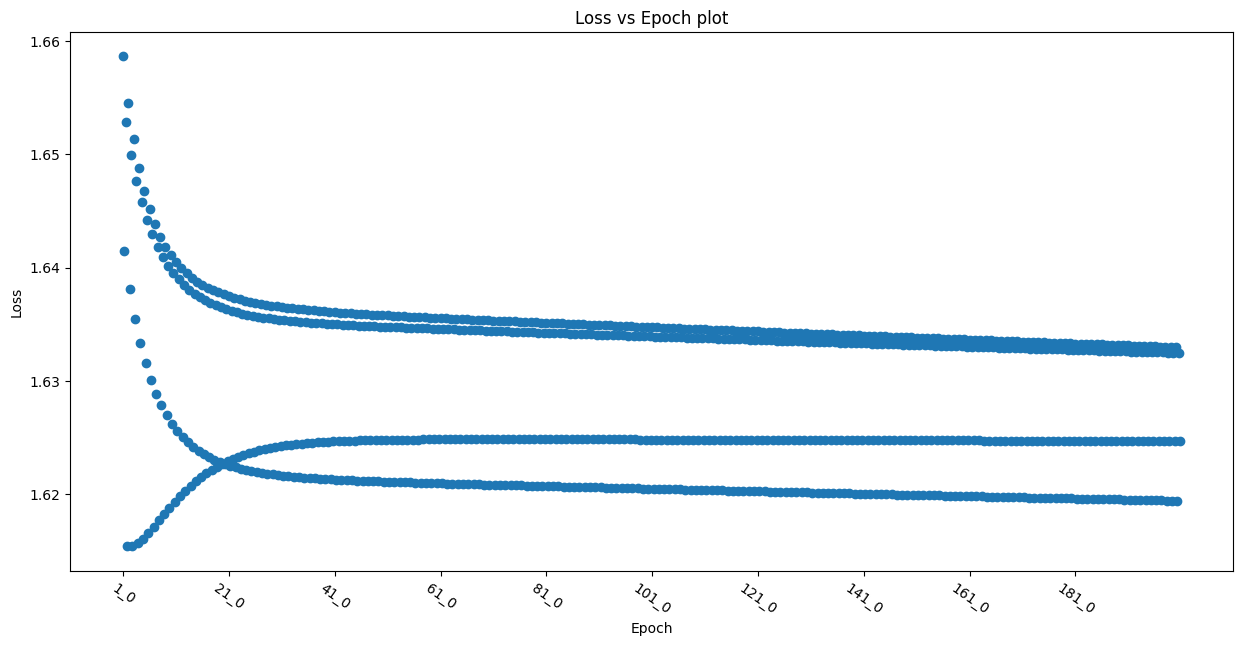

In [19]:
ffmodel_NAG.fit(X_train,Y_train_encoded,0.01,200)

In [21]:
ffmodel_Adagrad = FeedforwardNetwork(X_train,target_classes,'cross-entropy',layers,neurons_per_layer,'Adagrad','relu')

Feedforward network has been initialized.


Epochs:   0%|          | 0/200 [00:00<?, ?Epoch/s]

Training completed. Plotting the loss


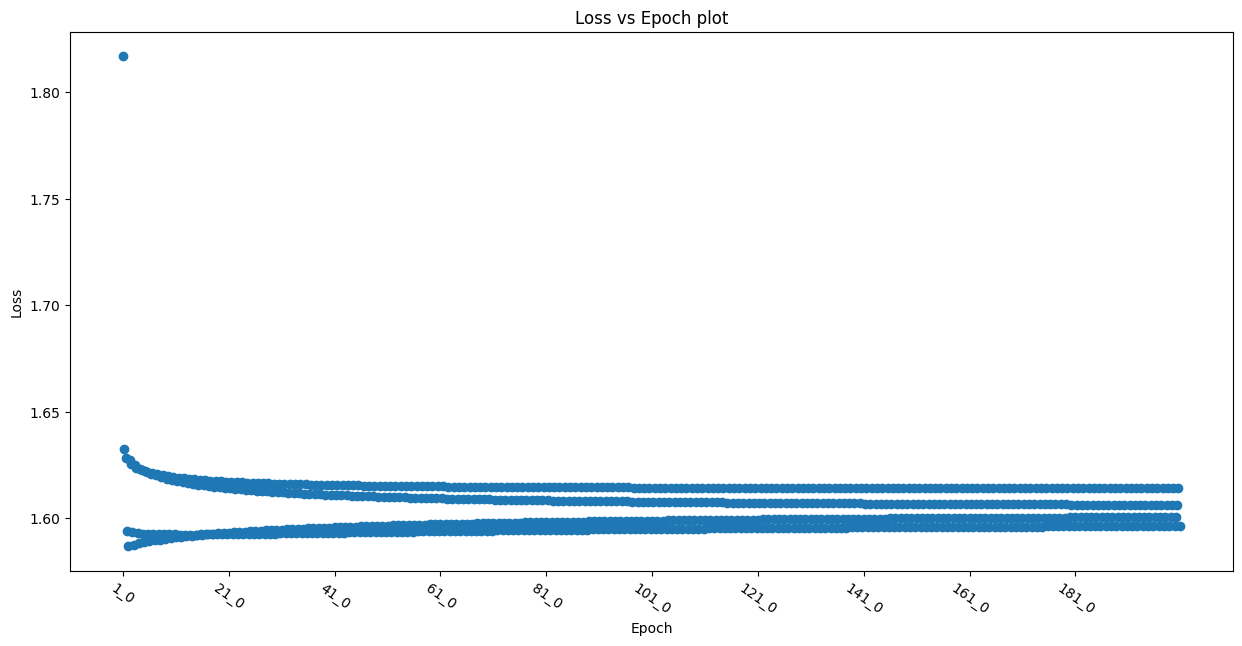

In [22]:
ffmodel_Adagrad.fit(X_train,Y_train_encoded,0.01,200)

In [23]:
ffmodel_Adam = FeedforwardNetwork(X_train,target_classes,'cross-entropy',layers,neurons_per_layer,'Adam','relu')

Feedforward network has been initialized.


Epochs:   0%|          | 0/50 [00:00<?, ?Epoch/s]

Training completed. Plotting the loss


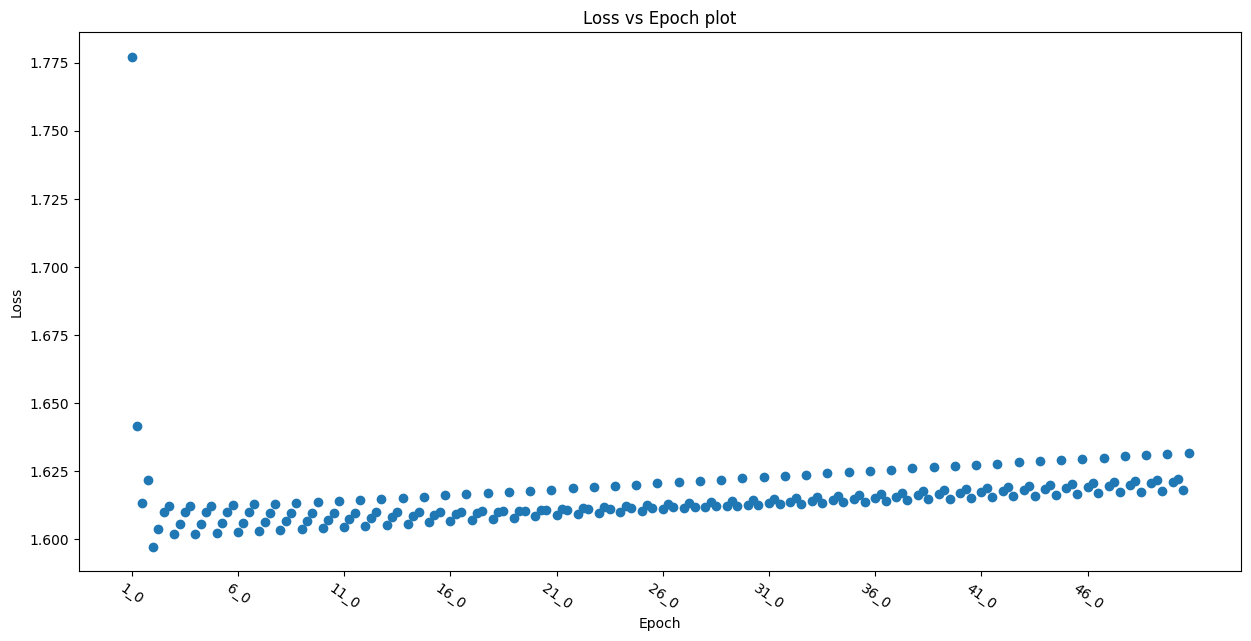

In [24]:
ffmodel_Adam.fit(X_train,Y_train_encoded,0.001,50)

#### Neural net testing

In [ ]:
for layer in range(layers):
    print(f'Weights shape: {ffmodel.weights[layer].shape}\nBias Shape: {ffmodel.bias[layer].shape}')
print(f'Weights shape: {ffmodel.weights[-1].shape}\nBias Shape: {ffmodel.bias[-1].shape}')

Weights shape: (10, 4)
Bias Shape: (128, 4)
Weights shape: (4, 3)
Bias Shape: (128, 3)
Weights shape: (3, 3)
Bias Shape: (128, 3)
Weights shape: (3, 4)
Bias Shape: (128, 4)
Weights shape: (4, 5)
Bias Shape: (128, 5)


In [4]:
test_keys = [str(x)+"_"+str(y) for x in range(1,10) for y in range(1,129)]

In [10]:
test_values = np.round(np.random.rand(len(test_keys)),2)

In [11]:
test_dict = dict(zip(test_keys,test_values))

In [ ]:
test_dict1 = {'1_0':1.8,'1_1':1.4,'1_2':1.25,'2_0':1.10,'2_1':0.95,'2_2':0.8}

([<matplotlib.axis.XTick at 0x7f1071d0a9b0>,
 [Text(0, 0, '1_1'),
  Text(128, 0, '2_1'),
  Text(256, 0, '3_1'),
  Text(384, 0, '4_1'),
  Text(512, 0, '5_1'),
  Text(640, 0, '6_1'),
  Text(768, 0, '7_1'),
  Text(896, 0, '8_1'),
  Text(1024, 0, '9_1')])

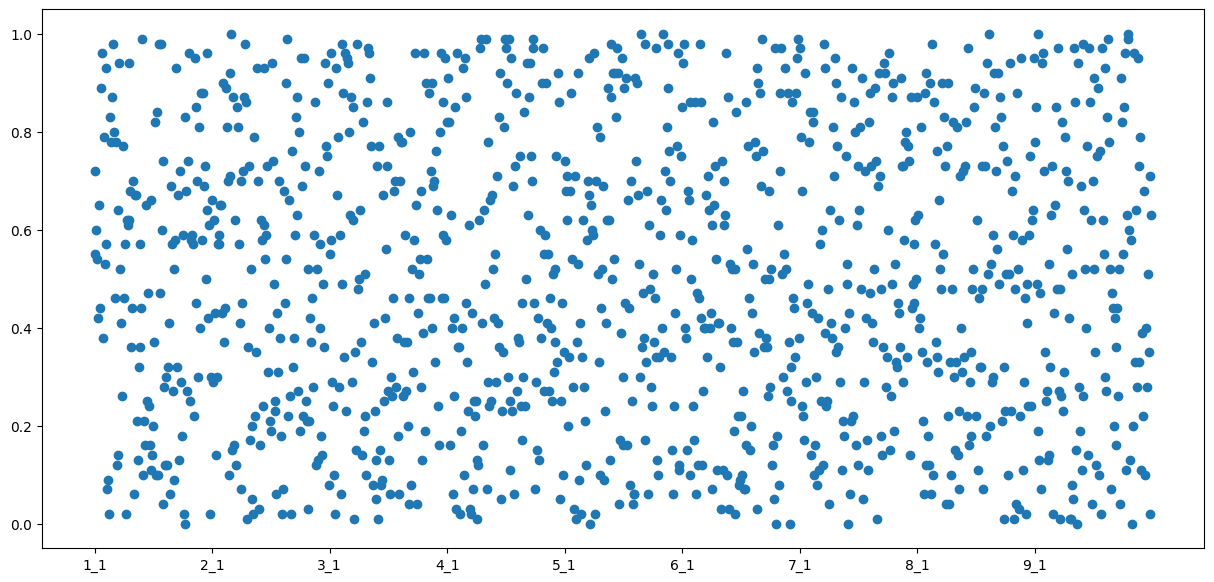

In [14]:
plt.figure(figsize=(15,7))
plt.scatter(test_dict.keys(),test_dict.values())
plt.xticks(np.arange(0,len(test_dict.keys()),128))